# Processos Estocásticos - Trabalho de Simulação

**Alunos:** Matheus Popst e Vitória Guardieiro

In [1]:
import numpy as np
from matplotlib import pyplot as pl

## Exercício 1

In [2]:
from exercicio1 import exercicio1

In [3]:
P = np.matrix([[1/3, 0, 2/3, 0, 0],
              [1/4, 1/2, 1/4, 0, 0],
              [1/2, 0, 1/2, 0, 0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 2/3, 1/3]])
P

matrix([[0.33333333, 0.        , 0.66666667, 0.        , 0.        ],
        [0.25      , 0.5       , 0.25      , 0.        , 0.        ],
        [0.5       , 0.        , 0.5       , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.66666667, 0.33333333]])

Todos os estados são recorrentes positivos, exceto o estado $2$, que é transiente. Além disso, os estados $1$ e $3$ formam uma classe de recorrência, assim como $4$ e $5$.

Para encontrarmos as distribuições estacionárias solucionamos $\pi P = \pi$:

$\frac{\pi_1}{3}+\frac{\pi_2}{4}+\frac{\pi_3}{2} = \pi_1$

$\frac{\pi_2}{2} = \pi_2$

$\frac{2\pi_1}{3}+\frac{\pi_2}{4}+\frac{\pi_3}{2} = \pi_3$

$\frac{2\pi_5}{3} = \pi_4$

$\pi_4+\frac{\pi_5}{3} = \pi_5$

$\pi_1+\pi_2+\pi_3+\pi_4+\pi_5 = 1$

E assim temos que: $\pi_2 = 0$, $\pi_1 = \frac{3\pi_3}{4}$ e $\pi_4 = \frac{2\pi_5}{3}$

Inserindo na última equação temos que $\pi_4 = \frac{6-14\pi_1}{15}$

E então, a distribuição estacionária é da forma $\left[k,0,\frac{4k}{3},\frac{6-14k}{15},\frac{3-7k}{5}\right]$, com $k$ real de forma que $\pi > 0$.

Para a distribuição estacionária quando começamos nos estados $1$, $2$ ou $3$, temos que é impossível chegarmos nos estados $4$ ou $5$, e então $\pi_4 = \pi_5 = 0$, logo $k = \frac{3}{7}$ e $\pi = \left[\frac{3}{7},0,\frac{4}{7},0,0\right]$.

Assim, temos que:

$$\lim_{n \rightarrow \infty} \mathbb{P}(X_n = 1 |\ X_0 = i) = \frac{3}{7}$$
$$\lim_{n \rightarrow \infty} \mathbb{P}(X_n = 2 |\ X_0 = i) = 0$$
$$\lim_{n \rightarrow \infty} \mathbb{P}(X_n = 3 |\ X_0 = i) = \frac{4}{7}$$

para $i$ em $1$, $2$ ou $3$, sendo todos iguais a zero caso contrário.

Já para os estados $4$ e$5$, temos que sua distribuição estacionária tem $\pi_1 = \pi_2 = \pi_3 = 0$, já que é impossível chegarmos em $1$, $2$ ou $3$ saindo de $4$ ou $5$. Assim, $k = 0$ e $\pi = \left[0, 0, 0, \frac{2}{5}, \frac{3}{5}\right]$.

E então:

$$\lim_{n \rightarrow \infty} \mathbb{P}(X_n = 4 |\ X_0 = i) = \frac{2}{5}$$
$$\lim_{n \rightarrow \infty} \mathbb{P}(X_n = 5 |\ X_0 = i) = \frac{3}{5}$$

para $i$ em $4$ ou $5$, sendo todos iguais a zero caso contrário.

Portanto, os valores corretos que esperamos encontrar com a simulação para os limites, considerando as colunas como $i$ e as linhas como $j$, são:

In [4]:
Limites = np.matrix([[3/7, 0, 4/7, 0, 0],
                    [3/7, 0, 4/7, 0, 0],
                    [3/7, 0, 4/7, 0, 0],
                    [0, 0, 0, 2/5, 3/5],
                    [0, 0, 0, 2/5, 3/5]])
Limites

matrix([[0.42857143, 0.        , 0.57142857, 0.        , 0.        ],
        [0.42857143, 0.        , 0.57142857, 0.        , 0.        ],
        [0.42857143, 0.        , 0.57142857, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.4       , 0.6       ],
        [0.        , 0.        , 0.        , 0.4       , 0.6       ]])

Simulando a cadeia de Markov temos:

In [5]:
L = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        L[i,j] = exercicio1(P, i+1, j+1, 100, 100)

In [6]:
L ##resultado estimado

array([[0.45, 0.  , 0.58, 0.  , 0.  ],
       [0.46, 0.  , 0.58, 0.  , 0.  ],
       [0.37, 0.  , 0.61, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.45, 0.62],
       [0.  , 0.  , 0.  , 0.44, 0.51]])

## Exercício 2

In [7]:
from exercicio2 import exercicio2

Dada a matriz de probabilidades:

In [8]:
P = np.matrix([[1/3, 0, 0, 2/3],
              [1/4, 1/2, 1/4, 0],
              [1/2, 0, 1/2, 0],
              [0, 1/3, 0, 2/3]])

Estimo numericamente $\lim_{n \rightarrow \infty} \frac{1}{n}\sum_{i=1}^{n} X_i^2$ através das simulações:

In [9]:
exercicio2(P, 1, 1000, 100) ##estimativa numérica

8.87235

Já o valor correto, temos que, pelo Teorema ergódico:

$$\lim_{n \rightarrow \infty} \frac{1}{n}\sum_{i=1}^{n} X_i^2 = \sum_{i=1}^{n} i^2\pi_i$$

Resolvendo a equação $\pi P = \pi$, temos que $\pi = \left[\frac{3}{15},\frac{4}{15},\frac{2}{15},\frac{6}{15}\right]$, e então:

$$\lim_{n \rightarrow \infty} \frac{1}{n}\sum_{i=1}^{n} X_i^2 = \sum_{i=1}^{n} i^2\pi_i = 1\cdot\frac{3}{15}+4\cdot\frac{4}{15}+9\cdot\frac{2}{15}+16\cdot\frac{6}{15} = \frac{133}{15} \approx 8,666$$

# Exercício 3

In [10]:
from exercicio3 import martingal

Simulo $100$ martinagales através da função $martingal$ e ploto seus resultados:

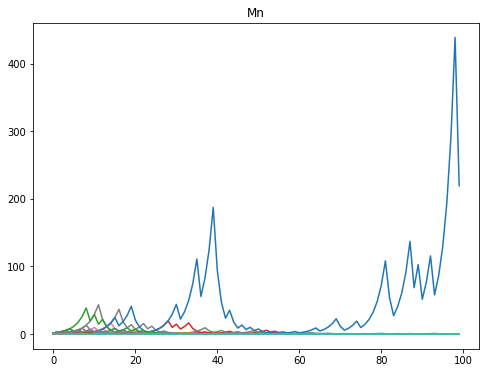

In [11]:
pl.figure(figsize=(8,6))
for i in range(100):
    pl.plot(martingal(100))
pl.title("Mn");

## Exercício 4

In [12]:
from exercicio4 import entre_chegadas, teorema448, estima_integral

In [13]:
lamb, T, J = 1, 5, 15

In [14]:
def plot_func_e_estima(lamb, T, J, func):
    guarda_temposMudanca = []
    for k in range(J):
        x = func(lamb,T)
        guarda_temposMudanca.append(x[:])
        y = [i for i in range(len(x))]
        x.append(T)
        y.append(y[-1])
        pl.step(x,y,where="post")
    ##estima integral
    numerador = sum(estima_integral(tempoMudanca,T) for tempoMudanca in guarda_temposMudanca)
    estimado = numerador / J
    print("A integral estimada para "+ func.__name__ +" é " + str(estimado))
    pl.show()

A integral estimada para entre_chegadas é 39.17286993644019


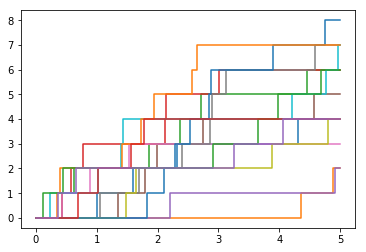

In [15]:
plot_func_e_estima(lamb,T,J,entre_chegadas)

A integral estimada para teorema448 é 25.21019964910163


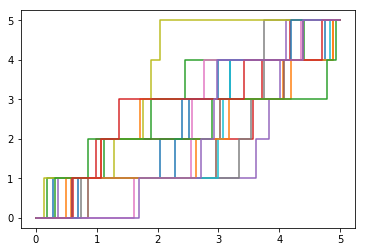

In [16]:
plot_func_e_estima(lamb,T,J,teorema448)

A integral estimada analiticamente 
$$\mathbb{E}\left[\int_0^T N_t\ dt\right] = \int_0^T\mathbb{E}\left[N_t\right] = \int_0^T \lambda t \ dt = \frac{\lambda T^2}{2}$$
Que nos oferece o resultado de $12,5$ quando colocados os parâmetros do exercício. O fato de termos obtido resultados distintos, nos levantou a dúvida que talvez o enunciado do exercício estivesse errado e devesse ter uma soma em detrimento de uma multiplicação.

## Exercício 5

In [17]:
from exercicio5 import exercicio5

In [18]:
n, m = 5, 50

In [19]:
sigma2 = 0.16

Defino $X$, $Y$ e $X^*$:

In [20]:
X = np.linspace(-np.pi, np.pi, n)
Y = np.sin(X)+np.random.normal(loc = 0, scale = sigma2, size = n)
Xn = np.linspace(-np.pi, np.pi, m)

Encontro as médias e variâncias utilizando uma regressão por processo gaussiano:

In [21]:
mu, cov = exercicio5(X, Xn, Y, sigma2);

Pego os desvios padrões na diagonal da matriz de variâncias:

In [22]:
stdv = np.sqrt(np.diag(cov))

Ploto:

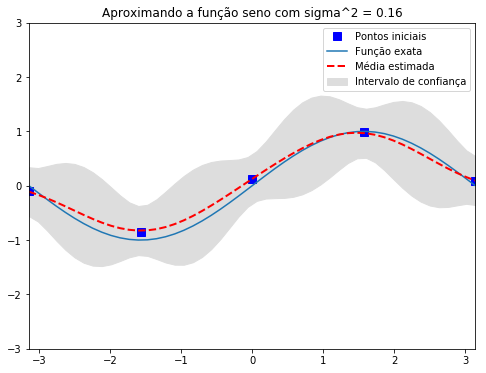

In [23]:
pl.figure(figsize=(8,6))
pl.plot(X, Y, 'bs', ms=8, label="Pontos iniciais")
pl.plot(Xn, np.sin(Xn), label="Função exata")
pl.gca().fill_between(Xn, mu-2*stdv, mu+2*stdv, color="#dddddd", label="Intervalo de confiança")
pl.plot(Xn, mu, 'r--', lw=2, label="Média estimada")
pl.axis([-np.pi, np.pi, -3, 3])
pl.title('Aproximando a função seno com sigma^2 = 0.16')
pl.legend()
pl.show()

In [24]:
sigma2 = 0

Sigo o mesmo processo que o anterior para o novo valor de $\sigma^2$:

In [25]:
X = np.linspace(-np.pi, np.pi, n)
Y = np.sin(X)+np.random.normal(loc = 0, scale = sigma2, size = n)
Xn = np.linspace(-np.pi, np.pi, m)

In [26]:
mu, cov = exercicio5(X, Xn, Y, sigma2);

In [27]:
stdv = np.sqrt(np.diag(cov))

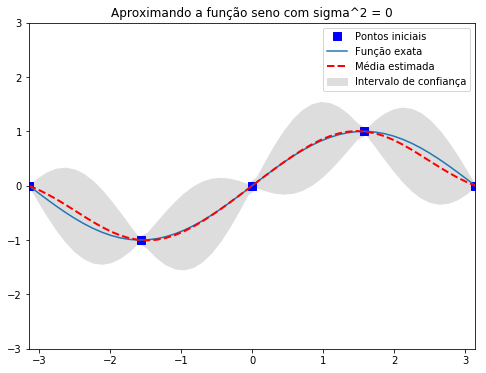

In [28]:
pl.figure(figsize=(8,6))
pl.plot(X, Y, 'bs', ms=8, label="Pontos iniciais")
pl.plot(Xn, np.sin(Xn), label="Função exata")
pl.gca().fill_between(Xn, mu-2*stdv, mu+2*stdv, color="#dddddd", label="Intervalo de confiança")
pl.plot(Xn, mu, 'r--', lw=2, label="Média estimada")
pl.axis([-np.pi, np.pi, -3, 3])
pl.title('Aproximando a função seno com sigma^2 = 0')
pl.legend()
pl.show()

## Exercício 6

In [29]:
from exercicio6 import exercicio6

Definindo $J = 1000$ e utilizo a função $exercicio6$ para simular $J$ vezes e ploto o histograma dos resultados:

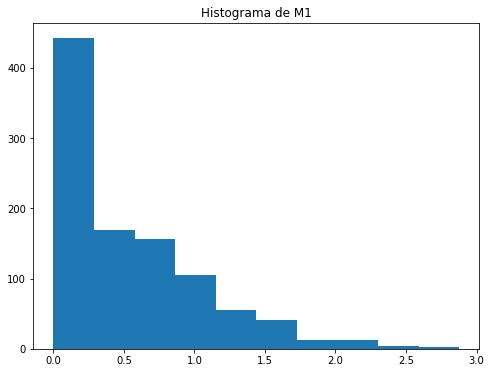

In [30]:
J = 1000
M = []
for j in range(J):
    M.append(exercicio6(5)[1])
pl.figure(figsize=(8,6))
pl.hist(M)
pl.title("Histograma de M1");

Já a densidade exata de $M_1$ é:

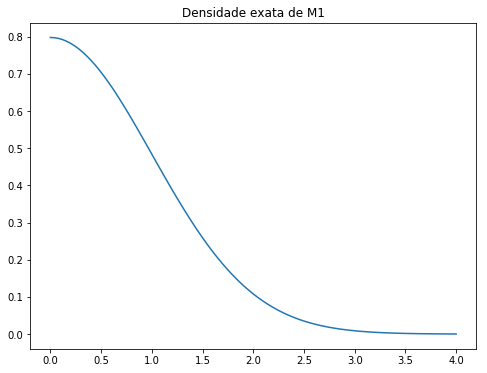

In [31]:
M1 = np.linspace(0, 4, 100)
f = (2/np.pi)**0.5*np.exp(-M1**2/2)
pl.figure(figsize=(8,6))
pl.plot(M1, f)
pl.title("Densidade exata de M1");

## Exercício 7

In [32]:
from exercicio7 import precifica_call, simula_black_sholes_so_o_final

In [33]:
S_0, r, sigma, T, N = 100, 0.05, 0.4, 1, 10000
K = [80+5*i for i in range(9)]

Simulo $N$ vezes o Black-Sholes, armazenando o resultado final em de cada simualação em $ST$. Em seguida, para $k$ na lista de $K$ definida anteriormente, chamo a função $prcifica\_call$ para calcular $C(k)$.

In [34]:
C = []
ST = [simula_black_sholes_so_o_final(S_0,r,sigma,T) for n in range(N)]
for k in K:
    C.append(precifica_call(r, T, k, N, ST))

O gráfico de $C(K)$ então fica:

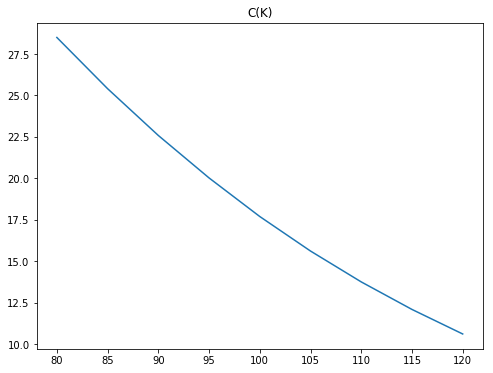

In [35]:
pl.figure(figsize=(8,6))
pl.plot(C)
pl.xticks([i for i in range(9)], K);
pl.title("C(K)");